#### Data Loading and Cleaning

In [6]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.ensemble
import math
import os
import time
from IPython.display import clear_output
import pickle

path="/Pickles"
pickleFolder=os.getcwd()+path

dataAtck=pd.read_pickle(pickleFolder+"/BaseAttackDataframe.pkl")
dataAtck_raw=dataAtck.copy()
dataAtck=dataAtck.drop(["Timestamp"], axis=1)
dataNorm=pd.read_pickle(pickleFolder+"/BaseNormalDataframe.pkl")
dataNorm_raw=dataNorm.copy()
dataNorm=dataNorm.drop(["Timestamp"], axis=1)

for x in dataNorm.columns[:-1]:
    dataNorm[x]=pd.to_numeric(dataNorm[x])
for x in dataAtck.columns[:-1]:
    dataAtck[x]=pd.to_numeric(dataAtck[x])

for x in dataNorm.columns:
    if ''.join([i for i in x if not i.isdigit()])=="P":
        dataNorm[x]=dataNorm[x]-1
        dataAtck[x]=dataAtck[x]-1

norm_att=list(dataAtck["Normal/Attack"])
for i in range(0,len(norm_att)):
    if norm_att[i] == "A ttack":
        norm_att[i]="Attack"

#### Timestamp Insertion

In [8]:
h=open("/home/sharding/Documents/SummerProject/Data/AttackList_Indexed.csv","r+")
file_atcklist=csv.reader(h)
top=next(file_atcklist)
attack_list=pd.DataFrame(file_atcklist)

tail=120
base=time.strptime('12/28/2015 10:00:00', '%m/%d/%Y %H:%M:%S')
attack_start_times=[]
for t in range(0,len(attack_list)):
    attack_start_times.append(int(time.mktime(time.strptime(attack_list.iloc[t][1], '%m/%d/%Y %H:%M:%S'))-time.mktime(base)))
attack_start_times=np.array(attack_start_times)
attack_end_times=[]
for t in range(0,len(attack_list)):
    attack_end_times.append(int(time.mktime(time.strptime(attack_list.iloc[t][2], '%m/%d/%Y %H:%M:%S'))-time.mktime(base)))
attack_end_times=np.array(attack_end_times)
attack_bins=np.transpose(np.vstack((attack_start_times,attack_end_times)))

dataAtck["Time"]=np.array([int(time.mktime(time.strptime(t, " %d/%m/%Y %I:%M:%S %p"))-time.mktime(base)) for t in np.array(dataAtck_raw["Timestamp"])])

#### Training/Testing Split

In [ ]:
selected_attack=attack_bins[0]
time_TF=np.multiply(np.array(dataAtck["Time"])>=selected_attack[0]-60,np.array(dataAtck["Time"])<=selected_attack[1]+60)
trainingData=dataAtck[[not(x) for x in time_TF]]
testingData=dataAtck[time_TF]

#### Training Forest

In [ ]:
dt=tree.DecisionTreeClassifier()
dt=dt.fit(trainingData.drop(["Normal/Attack","Time"],axis=1).values,list(trainingData["Normal/Attack"]))

In [ ]:
testPredict=[dt.predict(x.reshape(1,-1)) for x in testingData.drop(["Normal/Attack","Time"], axis=1).values]

In [ ]:
plt.figure(figsize=(20,10))
plt.plot([x[0] for x in testPredict])
plt.plot(list(testingData["Normal/Attack"]))

plt.show()

In [3]:
attack_bins

array([[  1754,   2693],
       [  3068,   3510],
       [  4920,   5302],
       [  6459,   6848],
       [  7255,   7450],
       [  7705,   8133],
       [ 11410,  12373],
       [ 15380,  15540],
       [ 15540,  16100],
       [ 90685,  90917],
       [ 92140,  92570],
       [ 93445,  93720],
       [103092, 103808],
       [115843, 116101],
       [116143, 116537],
       [117000, 117720],
       [132918, 133380],
       [142954, 143650],
       [172268, 172588],
       [172910, 173521],
       [198296, 199740],
       [227828, 229518],
       [229519, 263727],
       [279120, 279240],
       [280060, 281230],
       [302734, 303100],
       [347760, 348360],
       [361272, 361715],
       [371560, 371660],
       [371936, 372416],
       [389761, 390300],
       [436622, 437090],
       [437498, 437778],
       [438228, 438628],
       [438702, 438998],
       [443582, 445256]])

In [10]:
attack_list

,0,1,2,3,4
0,1,12/28/2015 10:29:14,12/28/2015 10:44:53,Single-Stage Single-Point,MV-101
1,2,12/28/2015 10:51:08,12/28/2015 10:58:30,Single-Stage Single-Point,P-102
2,3,12/28/2015 11:22:00,12/28/2015 11:28:22,Single-Stage Single-Point,LIT-101
3,4,12/28/2015 11:47:39,12/28/2015 11:54:08,Single-Stage Single-Point,MV-504
4,6,12/28/2015 12:00:55,12/28/2015 12:04:10,Single-Stage Single-Point,AIT-202
5,7,12/28/2015 12:08:25,12/28/2015 12:15:33,Single-Stage Single-Point,LIT-301
6,8,12/28/2015 13:10:10,12/28/2015 13:26:13,Single-Stage Single-Point,DPIT-301
7,10,12/28/2015 14:16:20,12/28/2015 14:19:00,Single-Stage Single-Point,FIT-401
8,11,12/28/2015 14:19:00,12/28/2015 14:28:20,Single-Stage Single-Point,FIT-401
9,13,12/29/2015 11:11:25,12/29/2015 11:15:17,Single-Stage Single-Point,MV-304


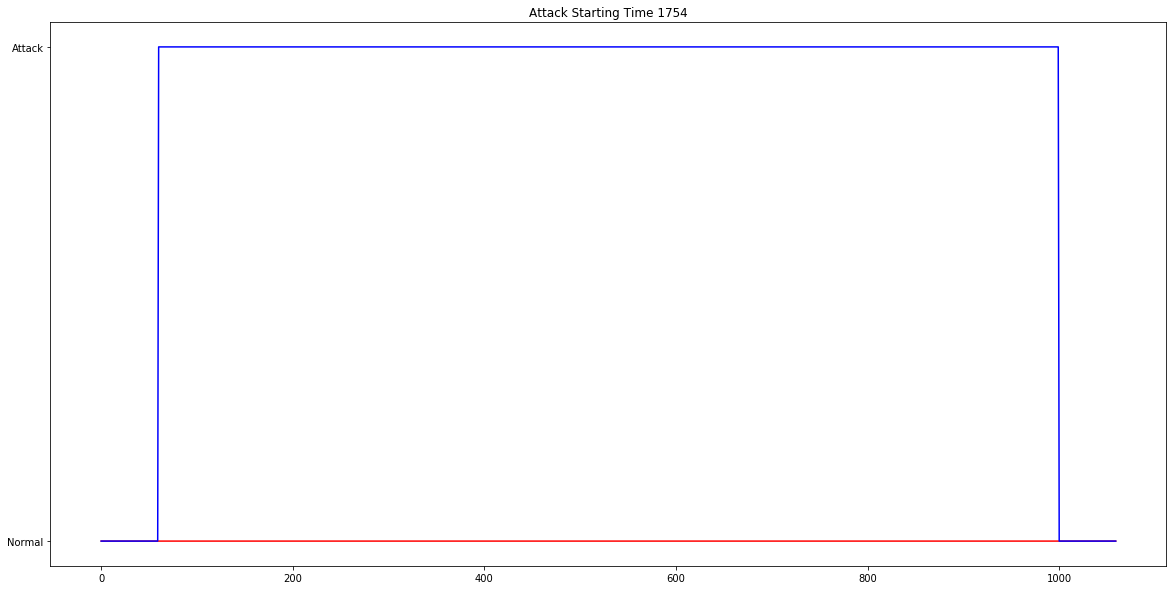

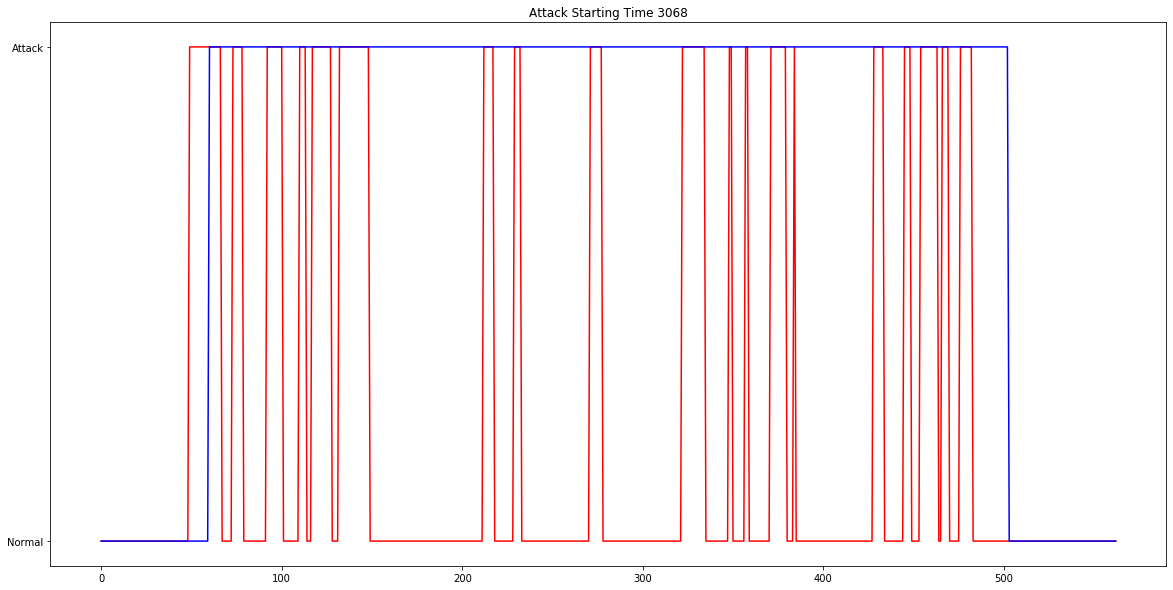

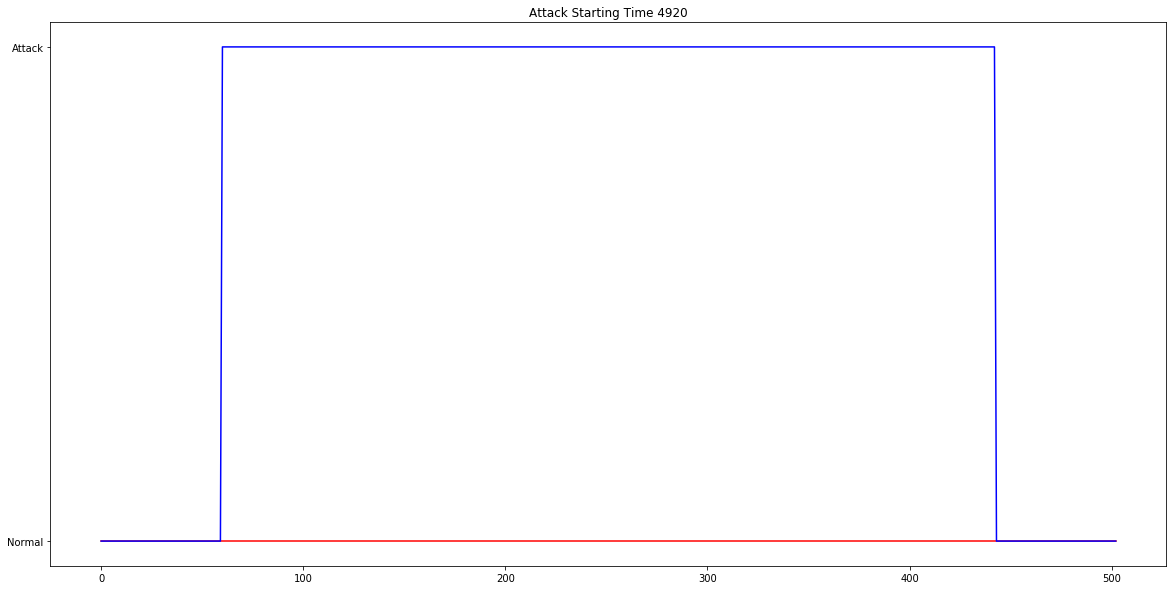

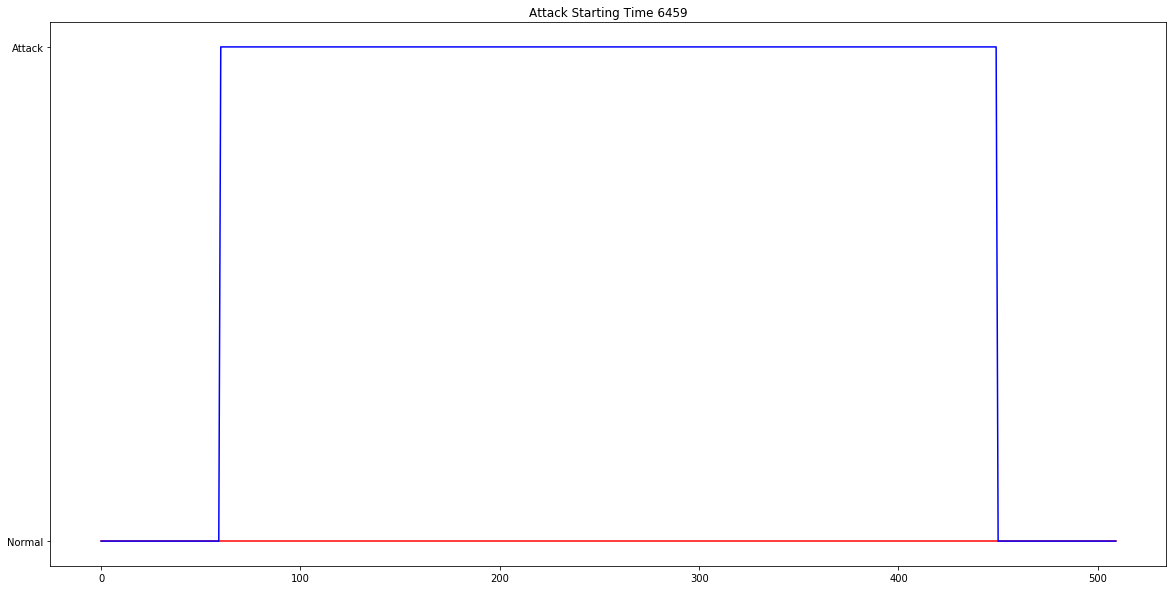

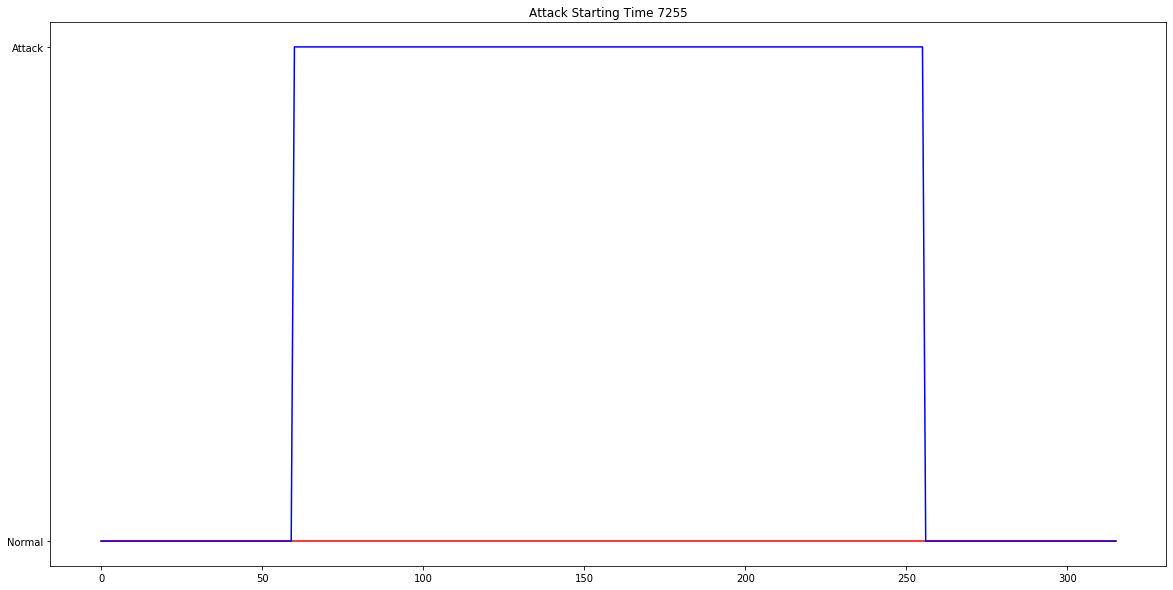

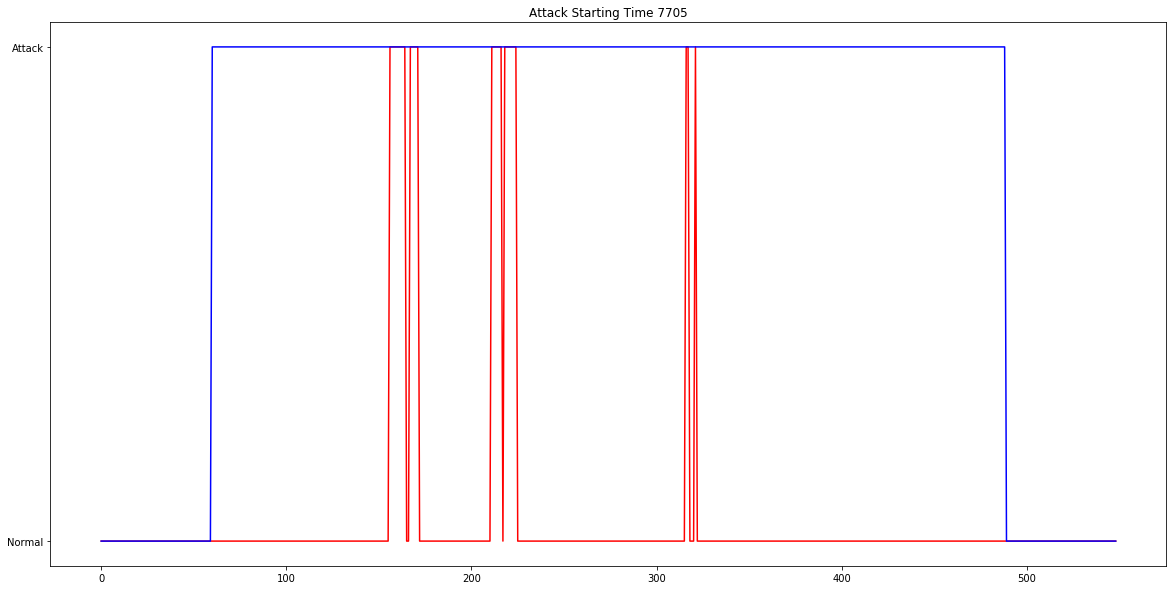

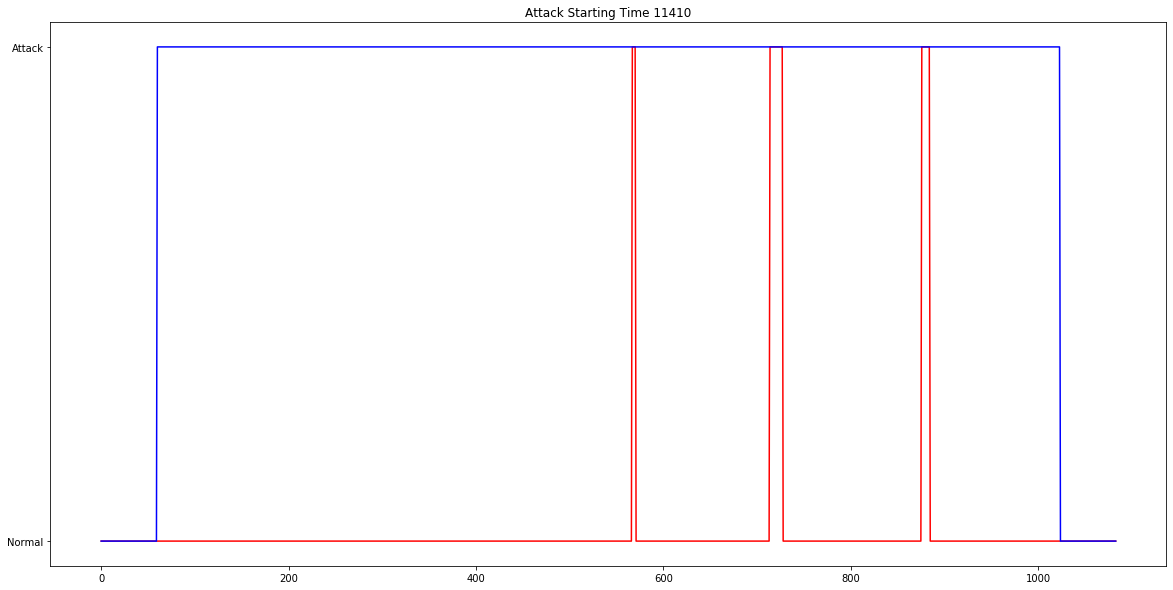

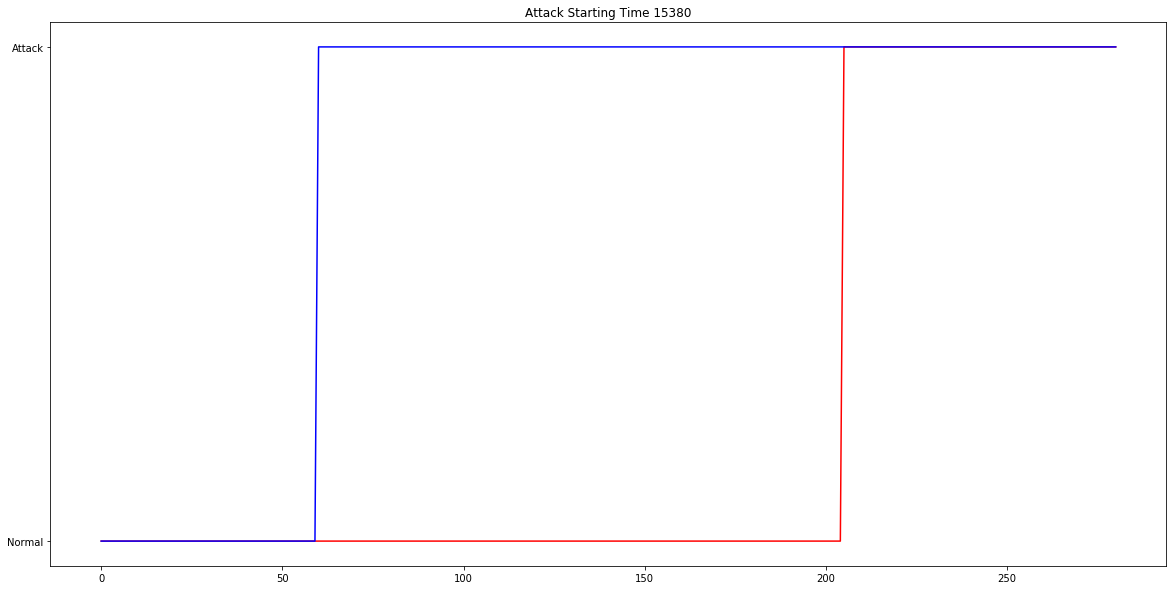

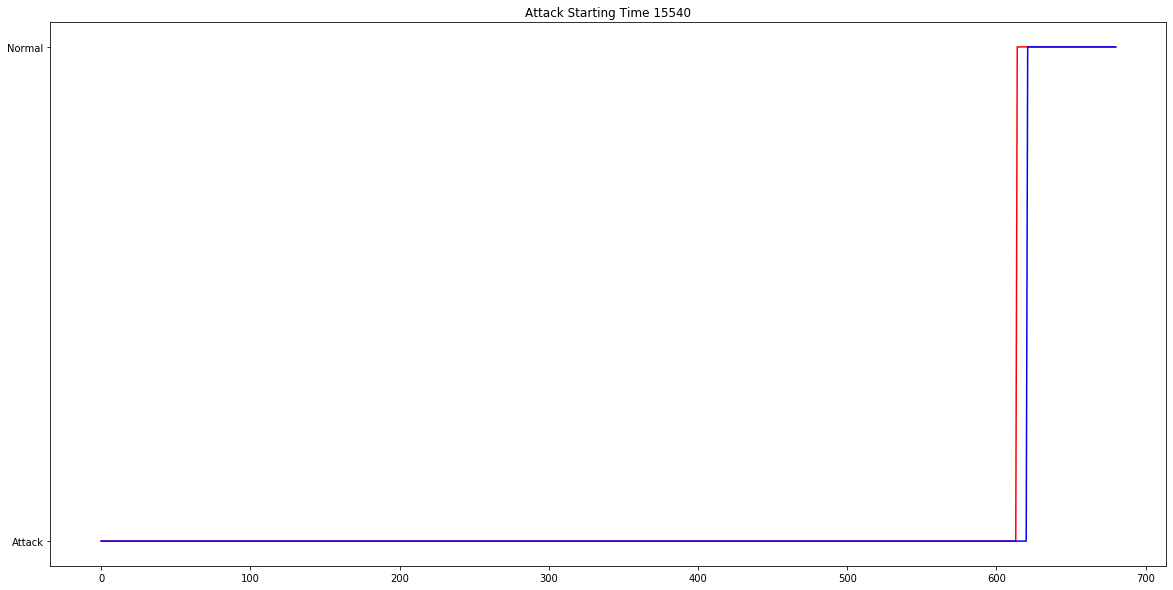

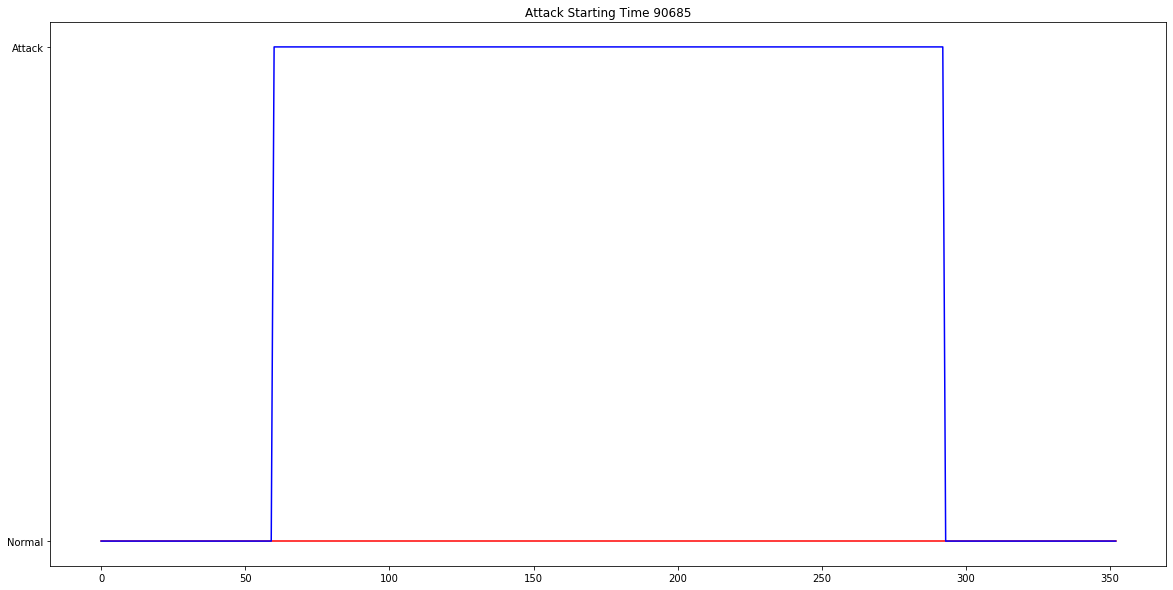

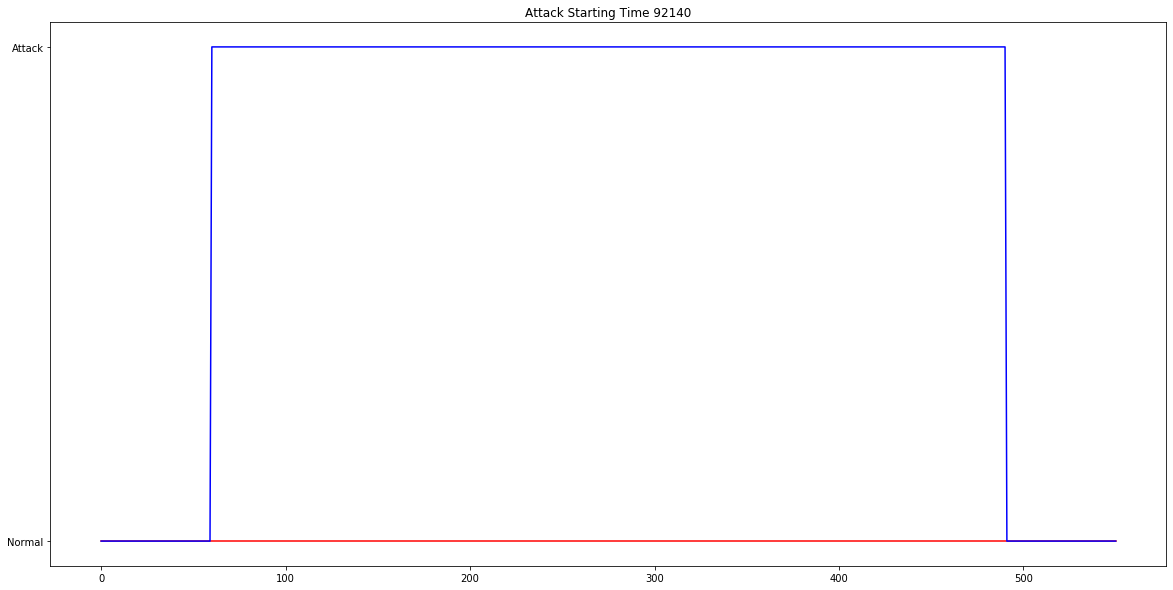

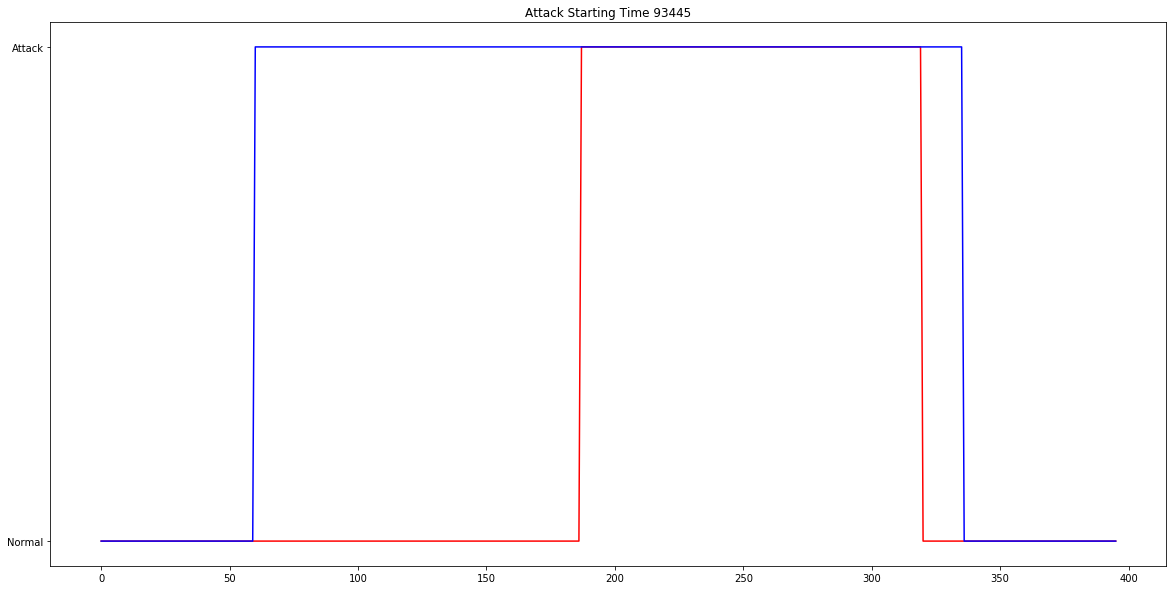

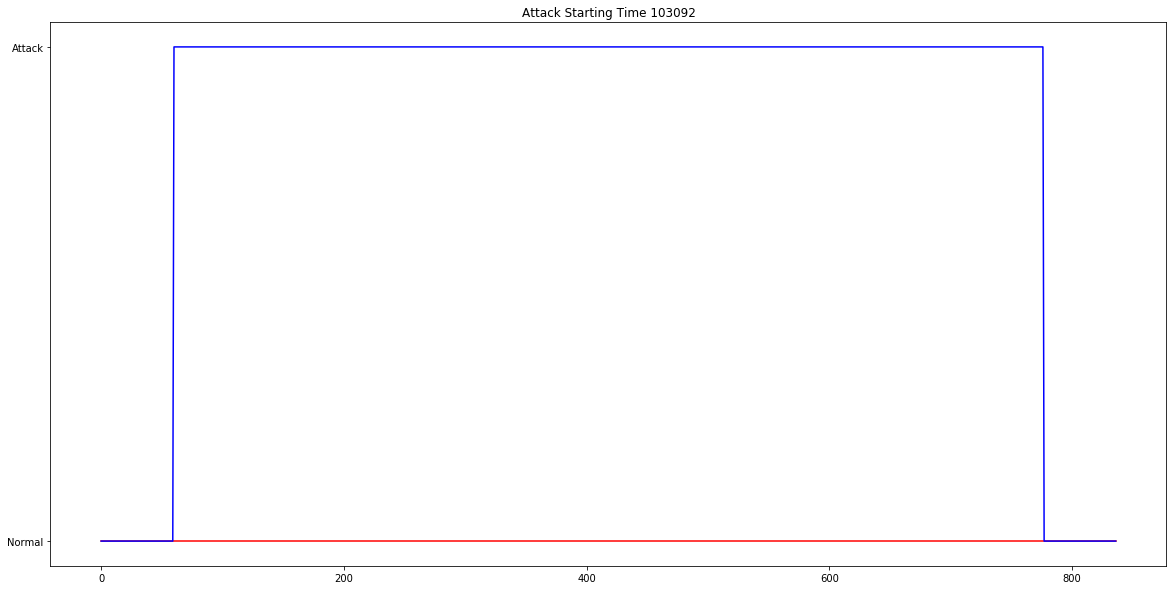

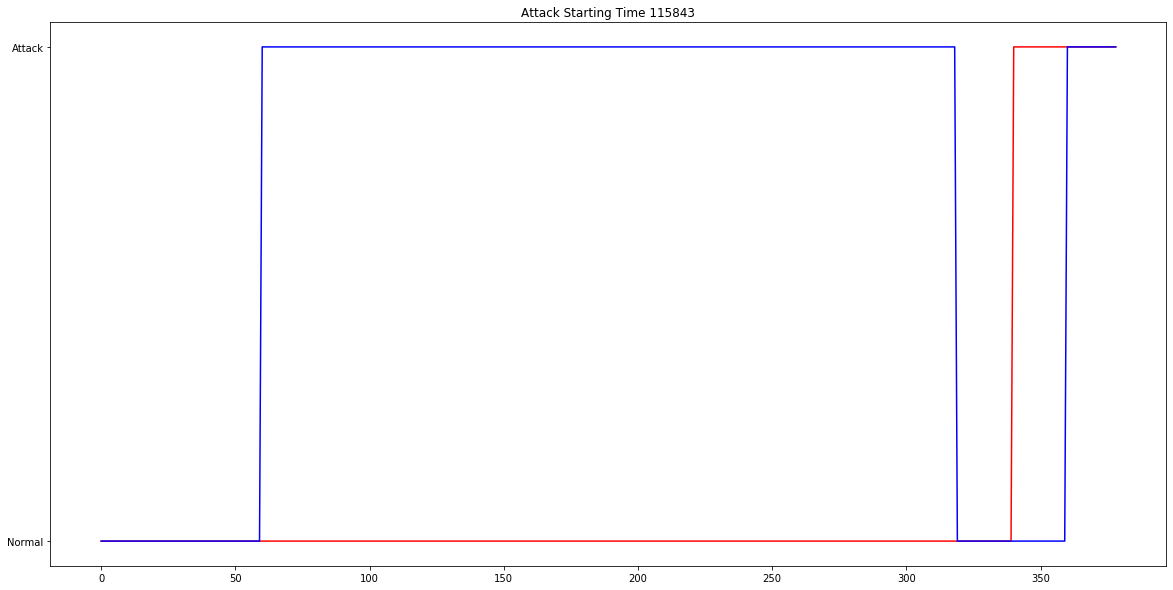

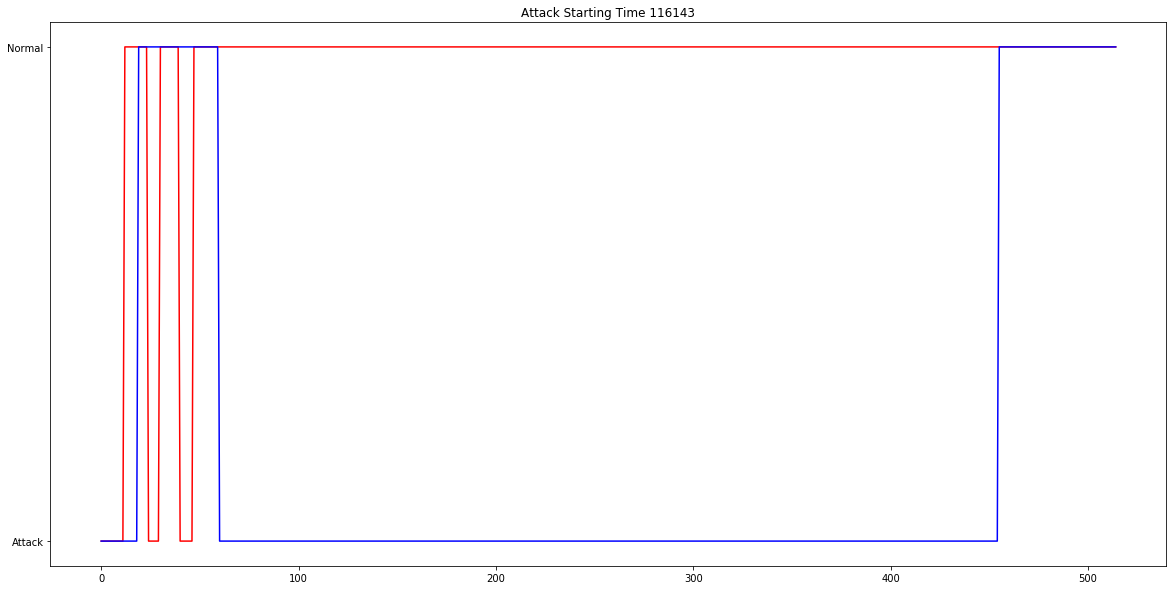

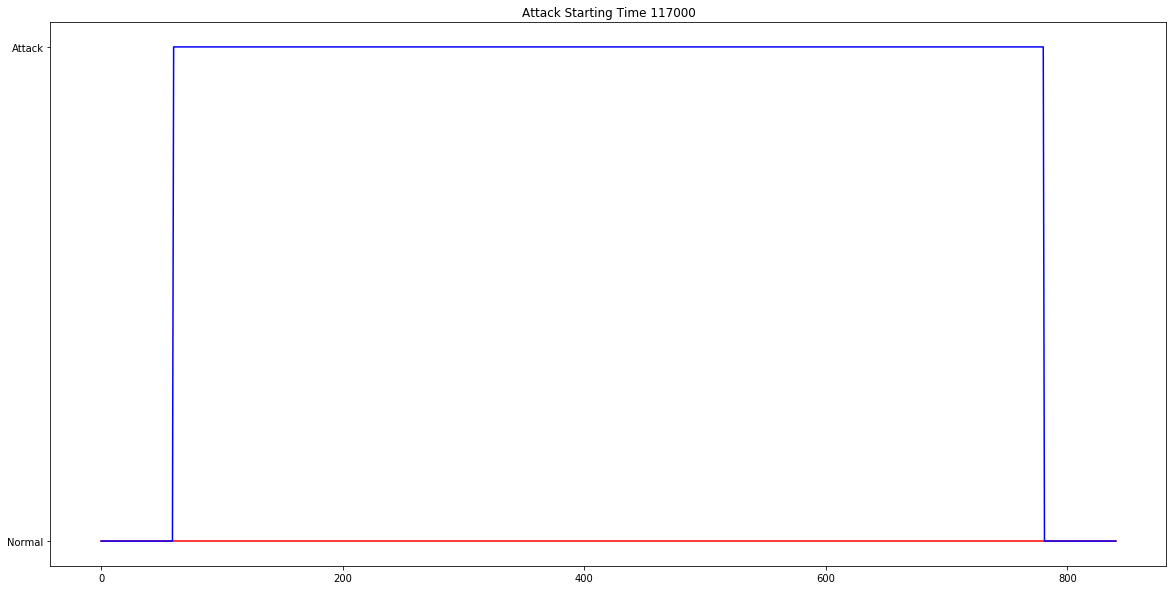

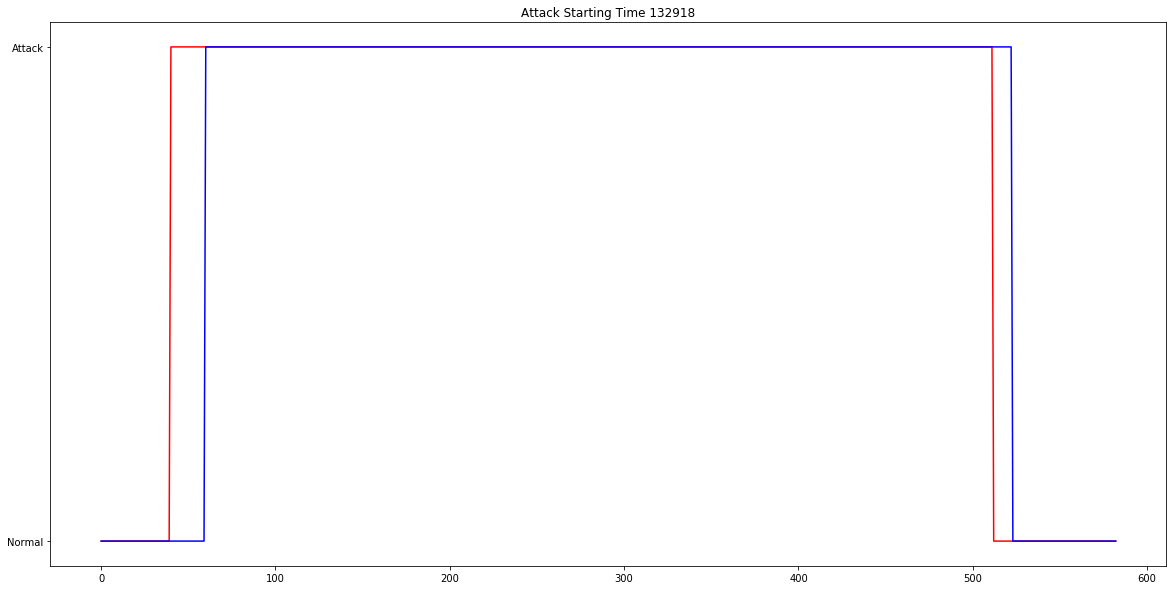

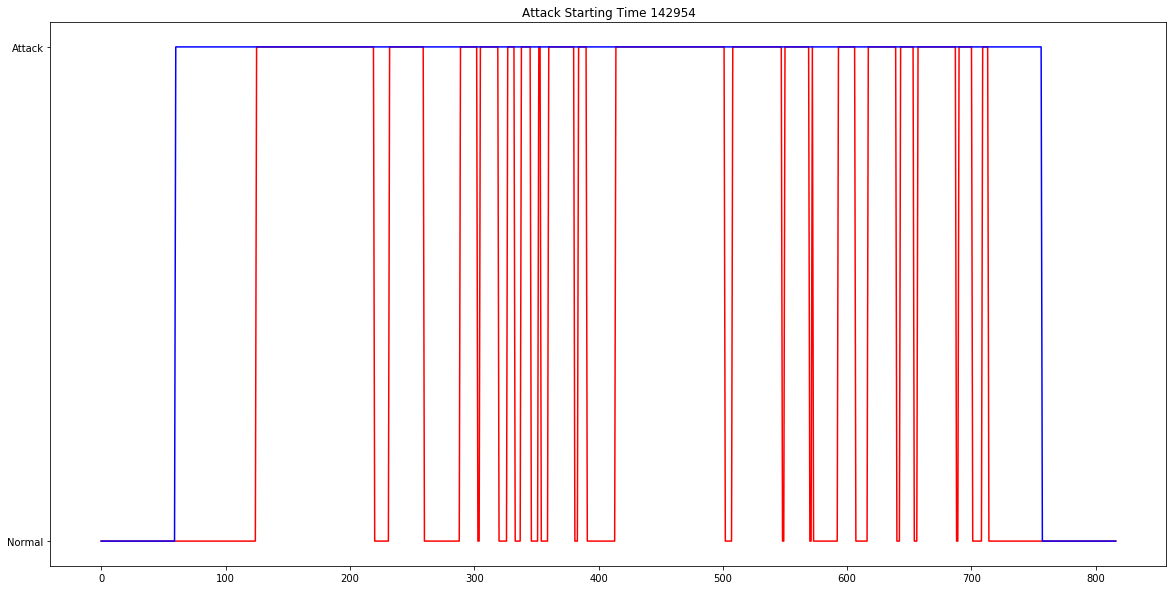

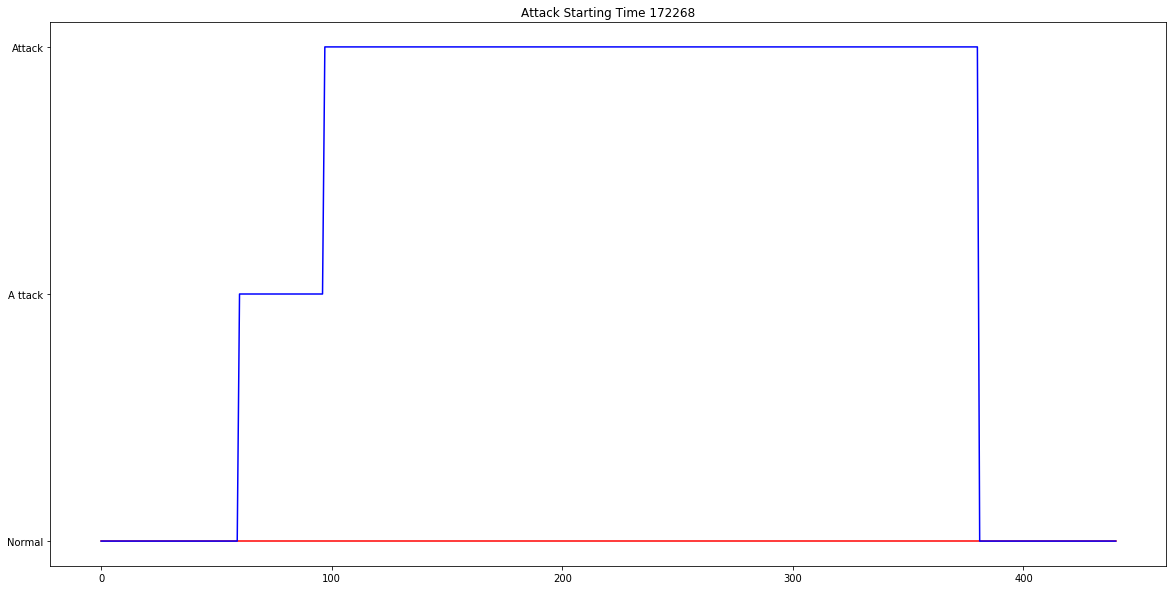

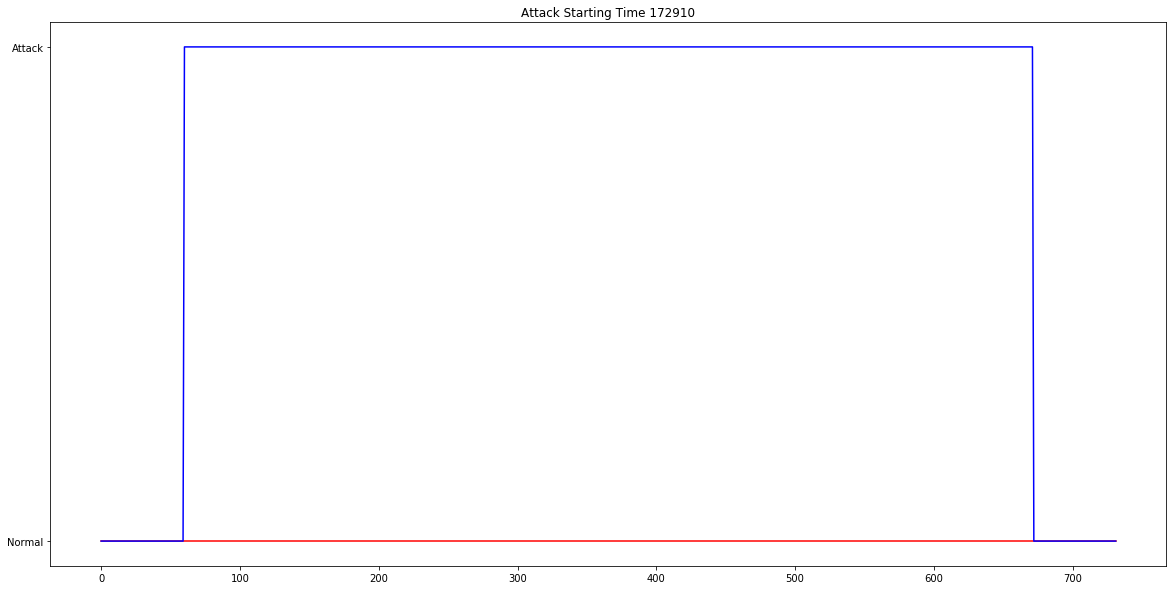

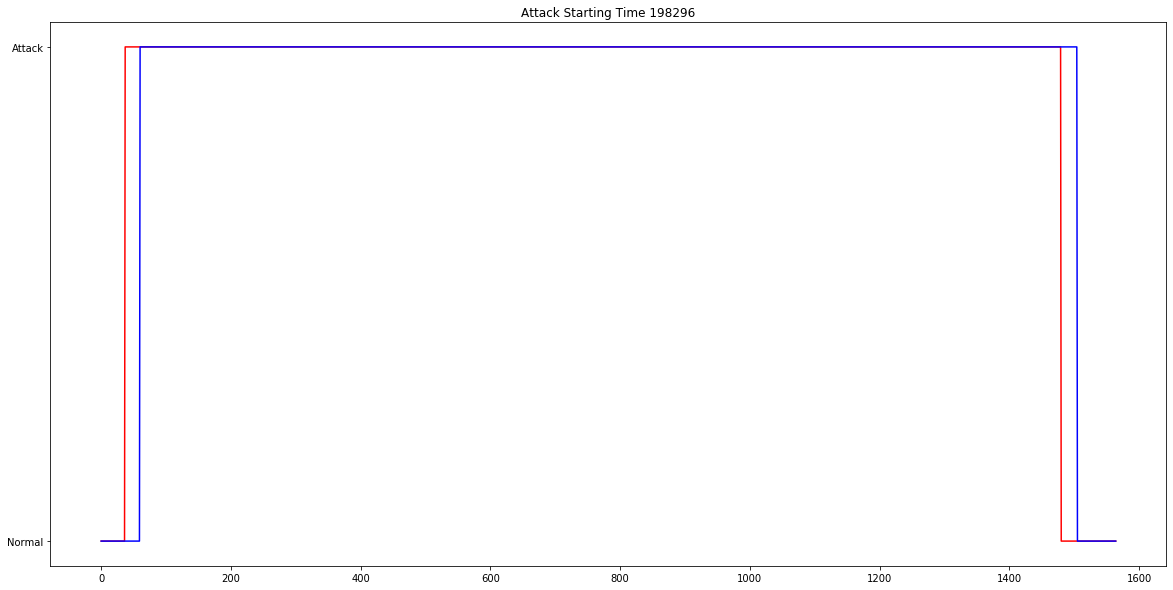

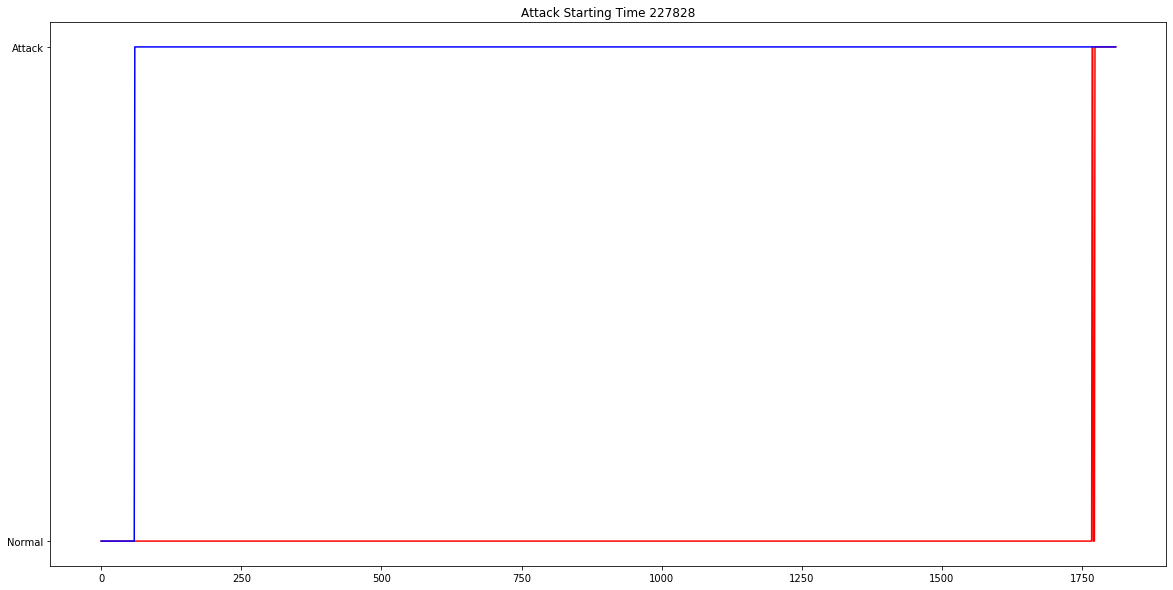

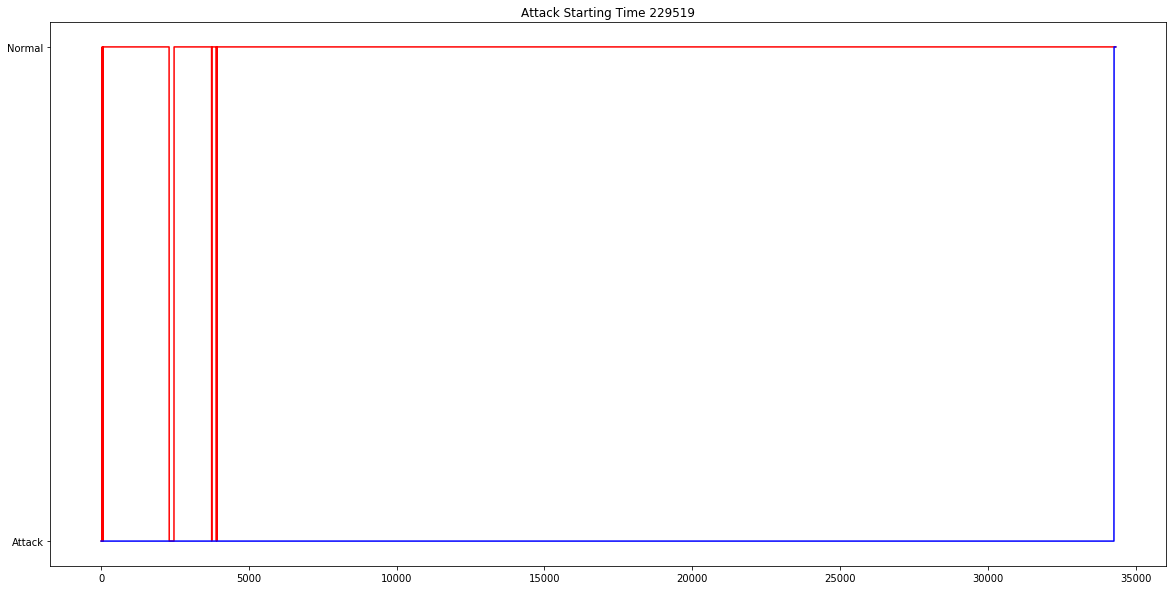

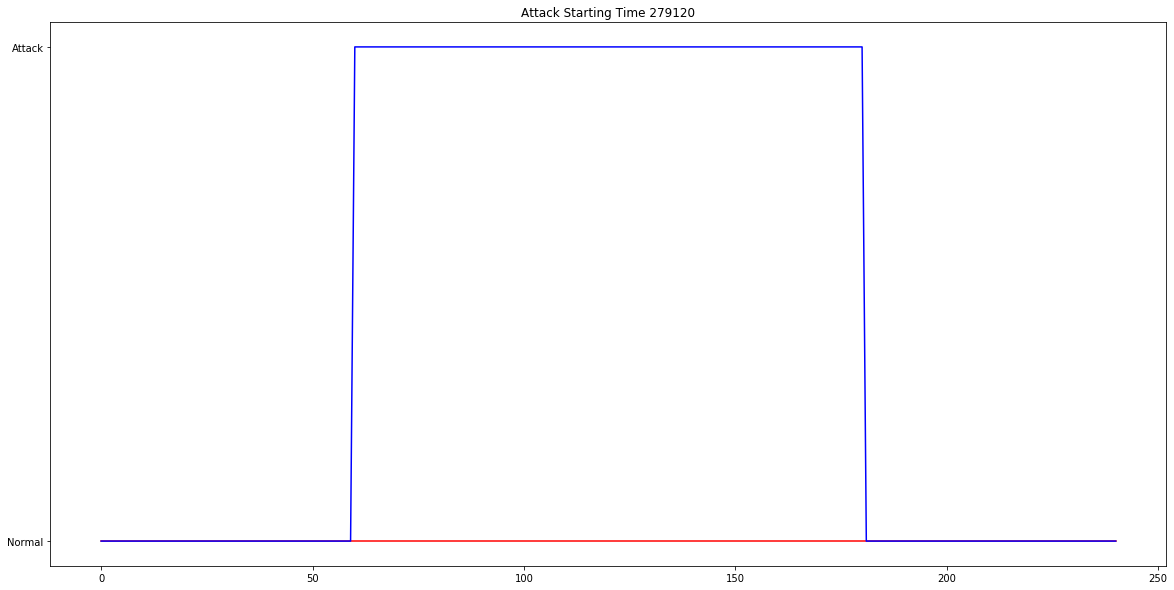

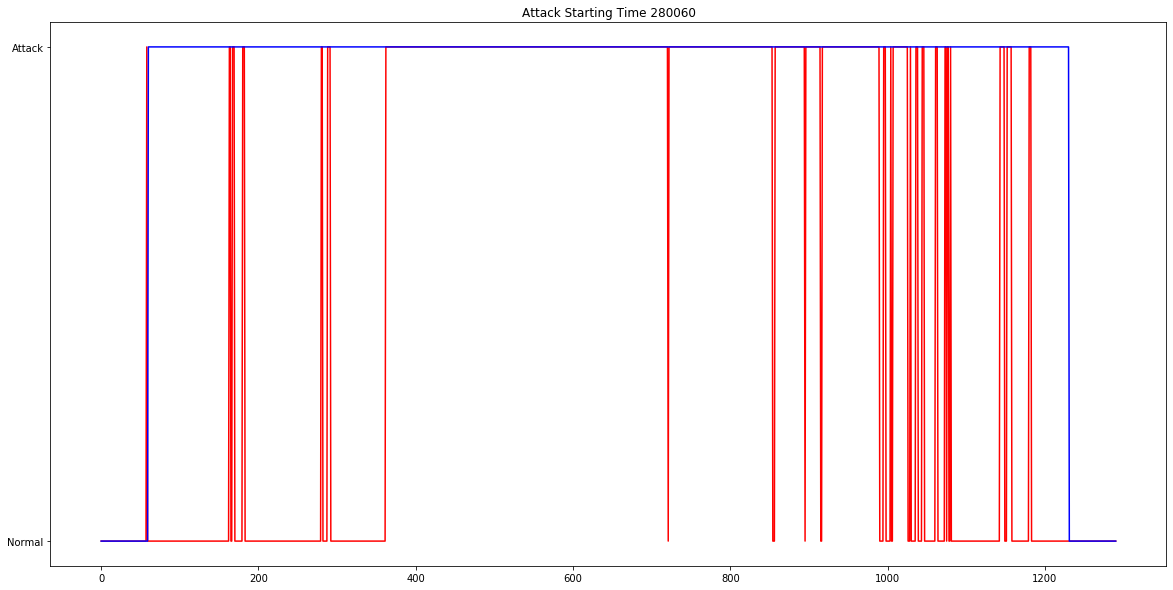

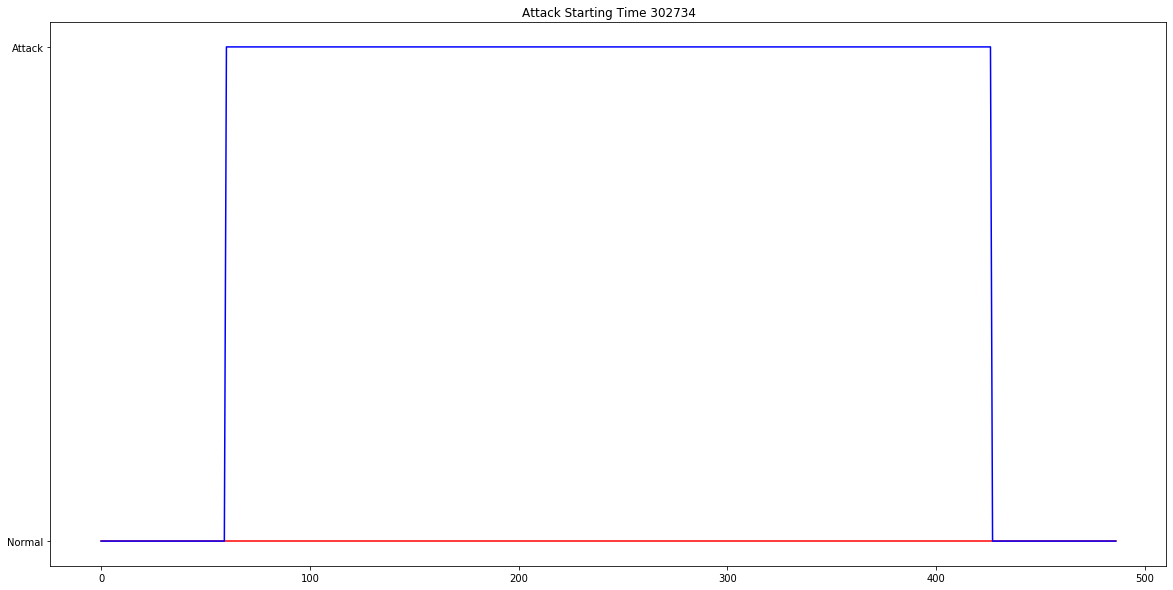

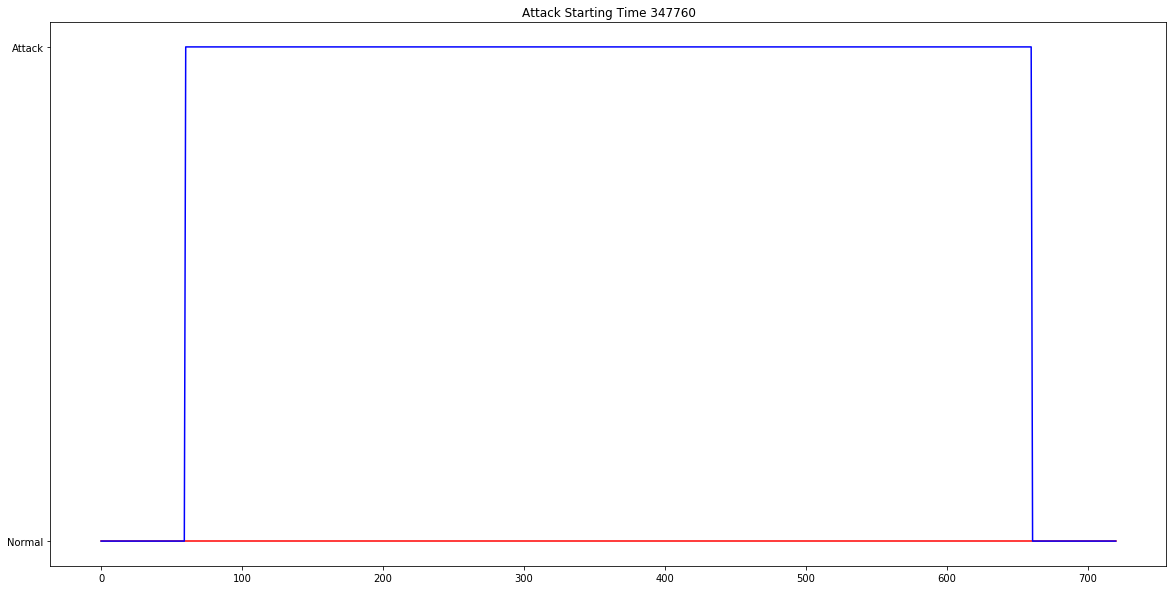

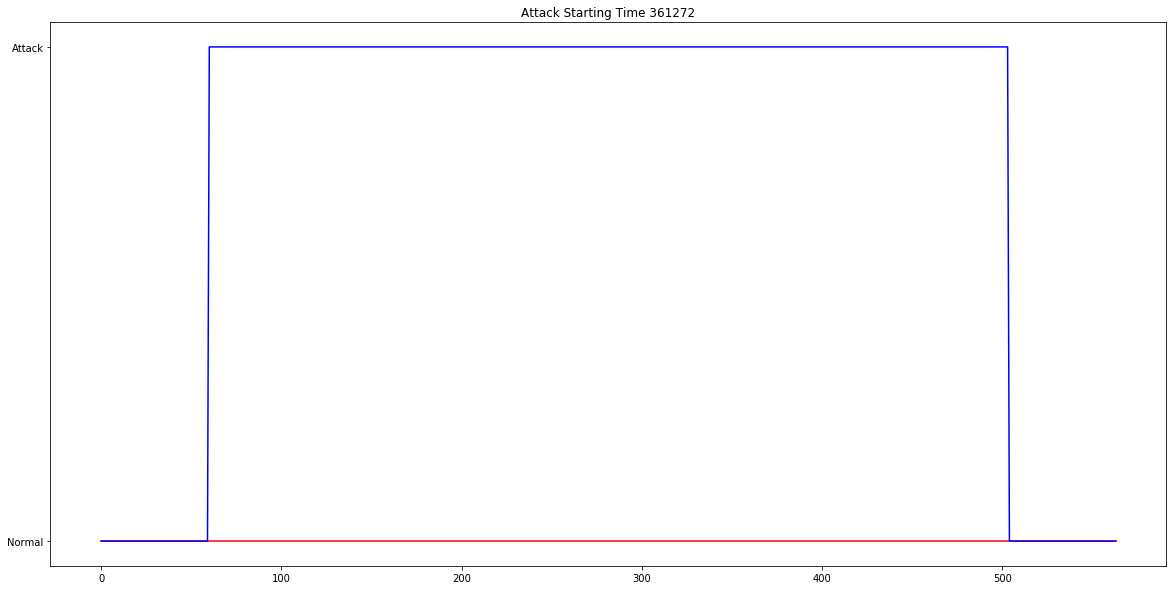

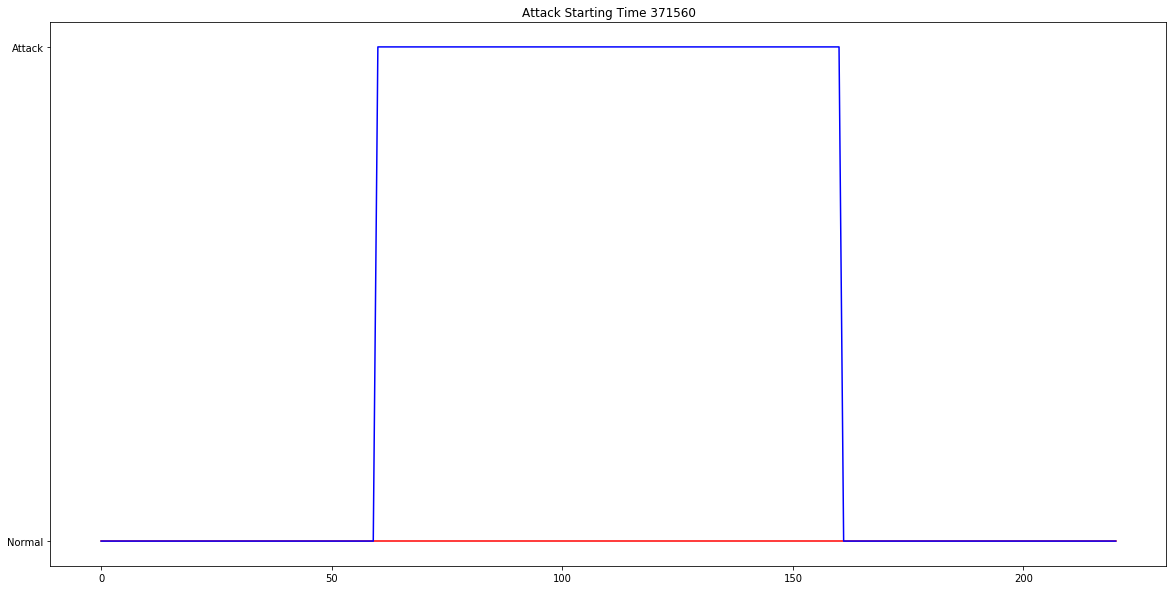

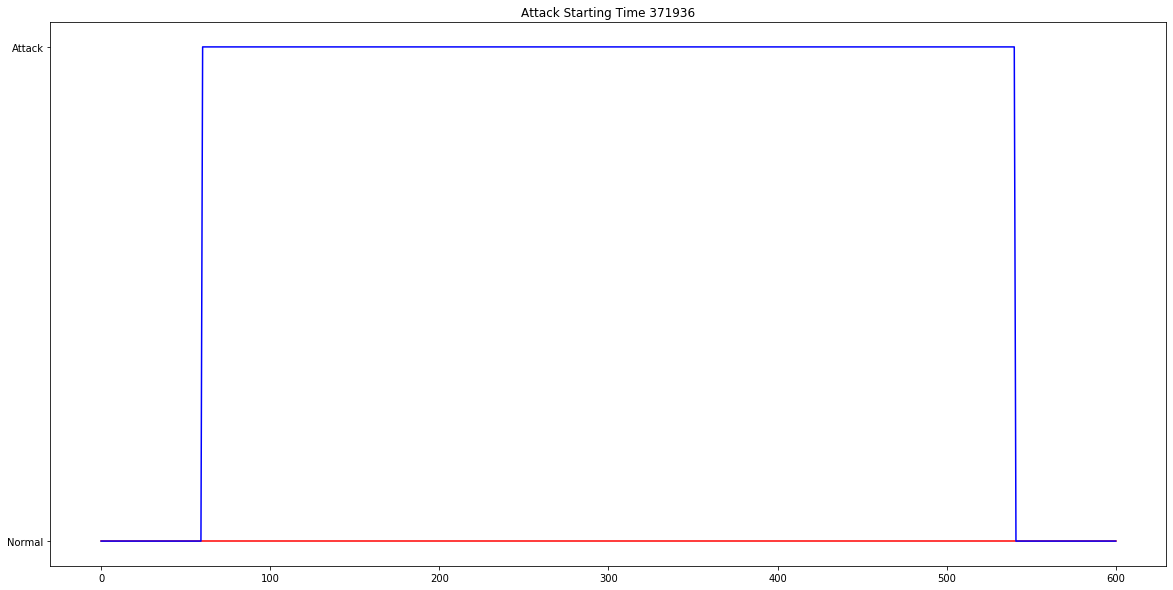

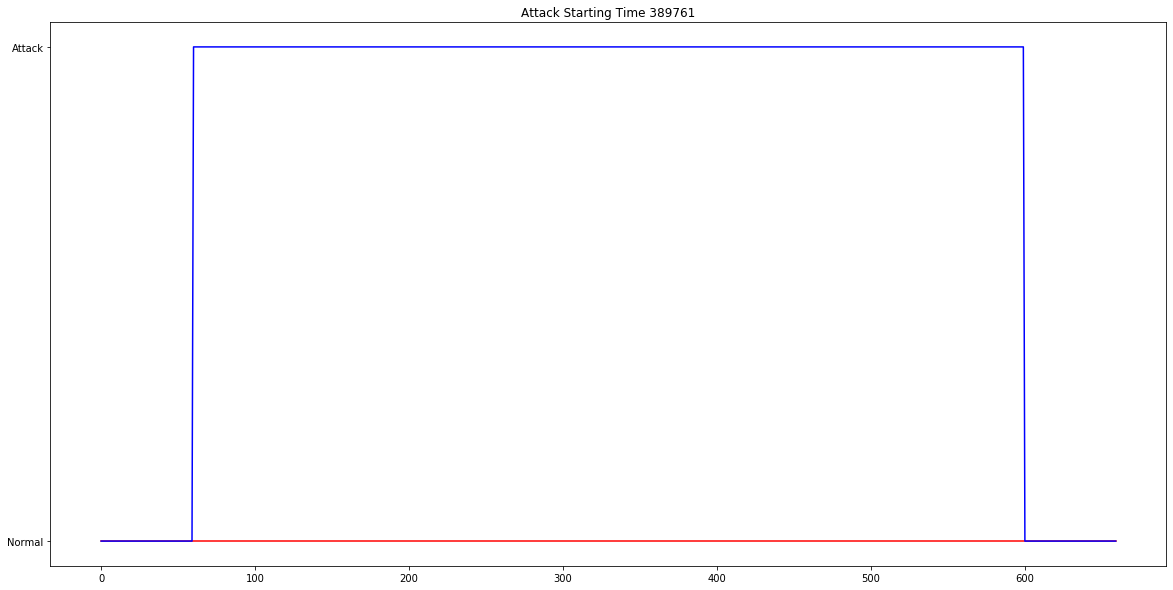

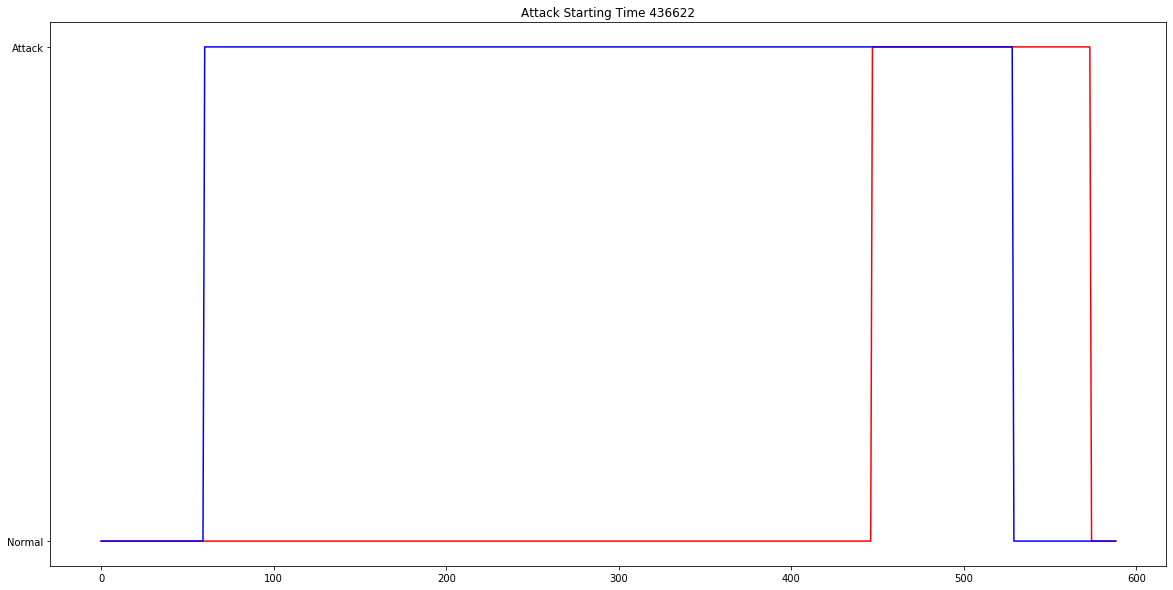

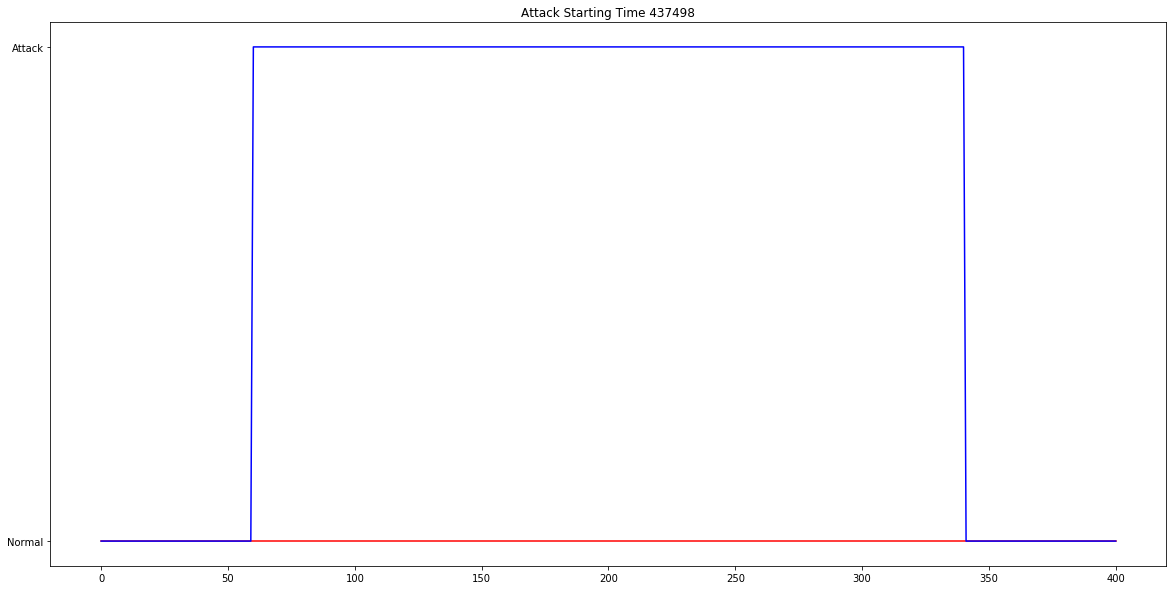

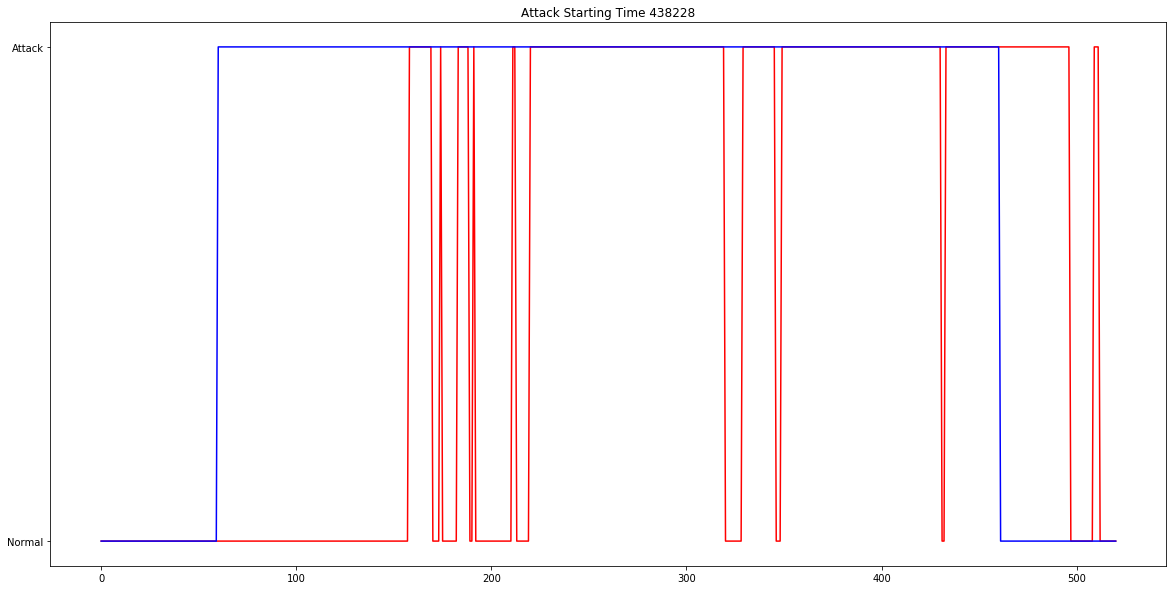

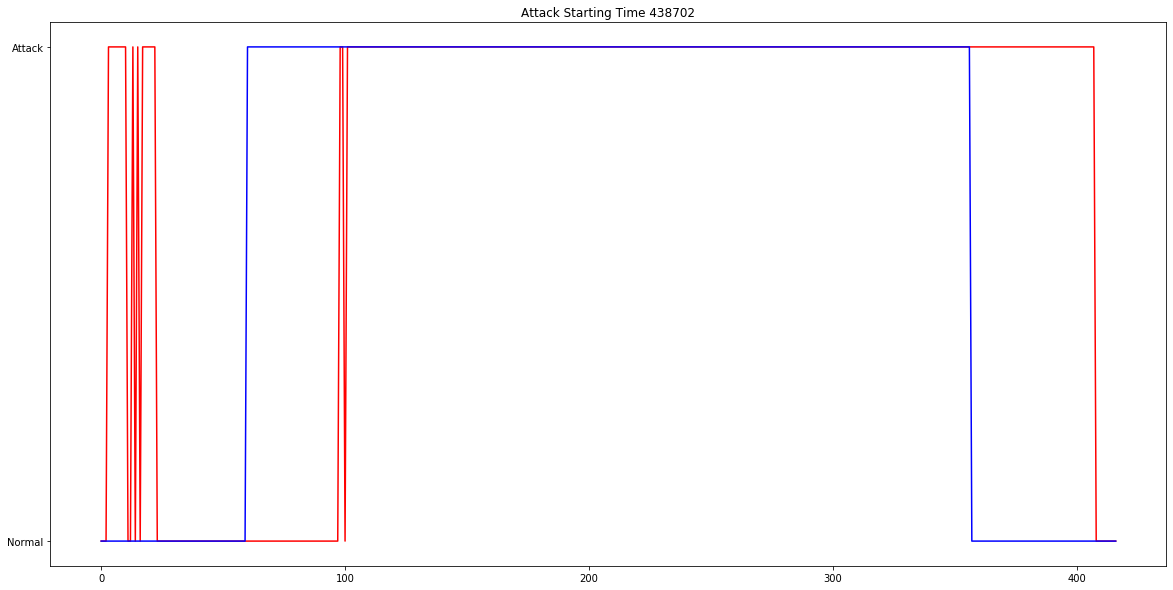

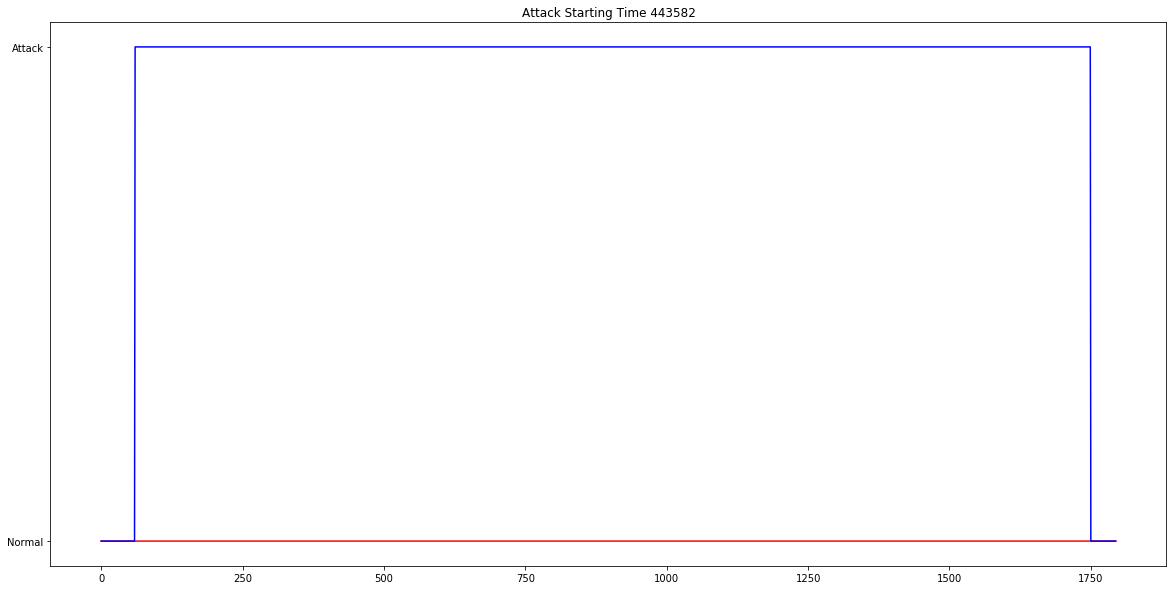

In [9]:
for selected_attack in attack_bins:
    time_TF=np.multiply(np.array(dataAtck["Time"])>=selected_attack[0]-60,np.array(dataAtck["Time"])<=selected_attack[1]+60)
    trainingData=dataAtck[[not(x) for x in time_TF]]
    testingData=dataAtck[time_TF]

    dt=sklearn.ensemble.RandomForestClassifier(n_estimators=50)
    dt=dt.fit(trainingData.drop(["Normal/Attack","Time"],axis=1).values,list(trainingData["Normal/Attack"]))

    testPredict=[dt.predict(x.reshape(1,-1)) for x in testingData.drop(["Normal/Attack","Time"], axis=1).values]

    plt.figure(figsize=(20,10))
    plt.plot([x[0] for x in testPredict],"r")
    plt.plot(list(testingData["Normal/Attack"]),"b")
    plt.title("Attack Starting Time %i" % selected_attack[0])
    plt.show()